In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Your solution goes here
data = pd.read_csv('chicken.csv')
n = 6
print(f"First {n} rows of the chicken data:")
data.head(n)





First 6 rows of the chicken data:


,week,age,diet,weight,eggs
0,0,147,A,3106.2,4
1,0,157,A,2891.7,5
2,0,163,A,2958.3,4
3,0,145,A,3188.7,5
4,0,162,A,3491.7,5
5,0,167,A,3050.2,5


### 1. Weight by diet summary stats (Pandas groupby and describe)

### 2. Eggs by diet summary stats (Pandas groupby and describe)

In [3]:
# Your solution goes here
print(
f"eggs: \n{data.groupby(['diet']).describe()['eggs'].round(3)} \n\n"
f"Weight: \n{data.groupby(['diet']).describe()['weight'].round(1)}"
)


eggs: 
      count   mean    std  min  25%  50%  75%  max
diet                                              
A     120.0  4.483  0.502  4.0  4.0  4.0  5.0  5.0
B     120.0  4.033  0.709  3.0  4.0  4.0  5.0  5.0
C     120.0  4.175  0.706  3.0  4.0  4.0  5.0  5.0 

Weight: 
      count    mean    std     min     25%     50%     75%     max
diet                                                              
A     120.0  3634.9  447.7  2683.9  3284.2  3601.1  3952.4  4845.0
B     120.0  3351.3  316.9  2690.3  3122.2  3333.6  3590.4  4057.6
C     120.0  3415.8  449.5  2383.3  3114.5  3417.8  3731.4  4508.7


### 3.1 Histogram of age of chickens (Pandas hist())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59e766cf50>]],
      dtype=object)

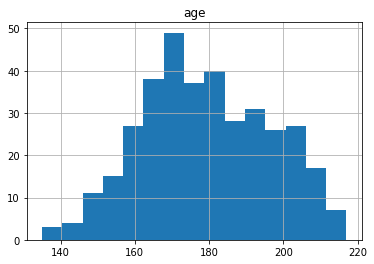

In [4]:
data.hist(column='age', bins=15)


### 3.2 Histogram of age of chickens (Seaborn distplot())

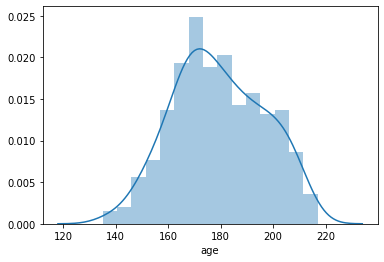

In [5]:
# Your solution goes here
sns.distplot(data['age'],15)

### 4.1 Boxplot age (Pandas boxplot())

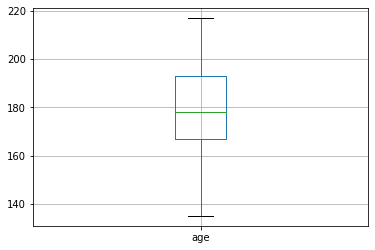

In [6]:
# Your solution goes here
data.boxplot(column='age')

### 4.2 Boxplot age (Seaborn boxplot())


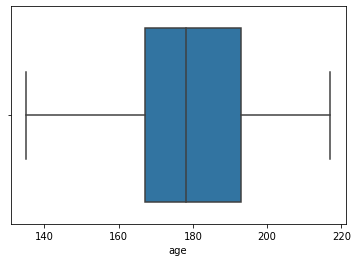

In [7]:
# Your solution goes here
sns.boxplot(data['age'])

### 5.1 Plot average weight vs weeks by diet (Pandas plot() on groupby()) 
Hint: groupby week and diet, calculate mean, get the weight colum, unstack and plot  
see here for more details:  
https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html

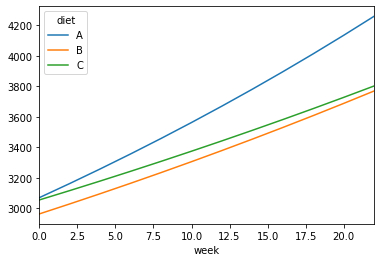

In [8]:
# Your solution goes here
data.groupby(['week', 'diet']).mean()['weight'].unstack(1).plot()

### 5.2 Plot average weight vs weeks by diet (Seaborn pointplot()) 
Hint: set `ci=None` to not get error bars

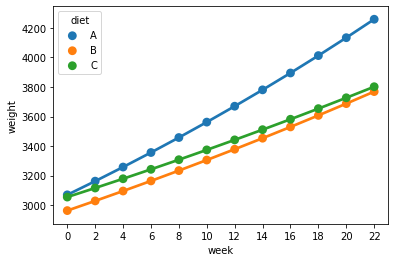

In [9]:
# Your solution goes here
sns.pointplot(x='week', y='weight', hue='diet', data=data, ci=False)

### 6.1 Plot average eggs vs weeks by diet (Pandas plot() on groupby()) 
Hint: It might be good to start y axis at 0

(0, 4.745)

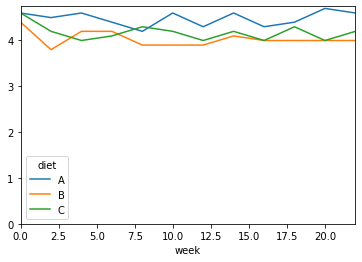

In [10]:
# Your solution goes here

data.groupby(['week', 'diet']).mean()['eggs'].unstack(1).plot().set_ylim(bottom=0)


### 6.2 plot average eggs vs weeks by diet (Seaborn pointplot()) 
Hint: It might be good to start y axis at 0

[(0, 4.754765124022749)]

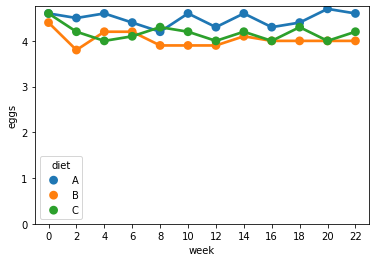

In [11]:
# Your solution goes here
lm = sns.pointplot(x='week', y='eggs', hue='diet', data=data, ci=False)
lm.set(ylim=(0,None))

### 7. Average age by diet stats (Pandas groupby())

In [12]:
# Your solution goes here

data.groupby(by='diet')['age'].mean()

diet
A    166.5
B    187.9
C    183.4
Name: age, dtype: float64

### 8.1 Scatter plot eggs vs age by diet (Pandas plot.scatter())
Hint: You need to loop over the diet 'A', 'B', 'C' and plot each seperatly in the same axes. Use `ax=plt.gca()` to get repeated plots to appear in the same axes. For more info, have a look at the following thread:  



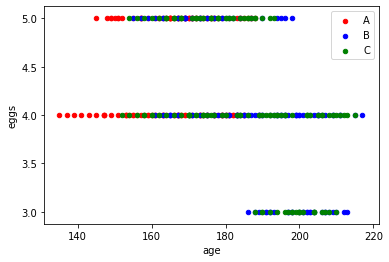

In [13]:

fig, ax = plt.subplots()

colors = {'A':'red', 'B':'blue', 'C':'green'}

grouped = data.groupby('diet')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='eggs', label=key, color=colors[key])

plt.show()

### 8.2 Scatter plot eggs vs age by diet (Seaborn scatterplot()) 


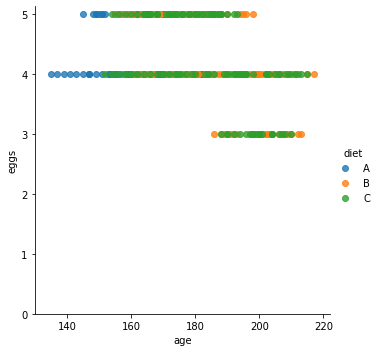

In [14]:
lm = sns.lmplot('age', 'eggs', data,hue='diet',fit_reg=False)
lm.set(ylim=(0,None))




### 9.1 Boxplot age by diet (Pandas boxplot())

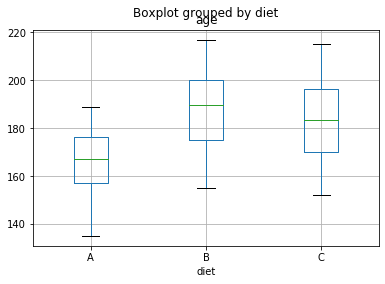

In [15]:
data.boxplot(column='age', by='diet')

### 9.2 Boxplot age by diet (Seaborn boxplot())

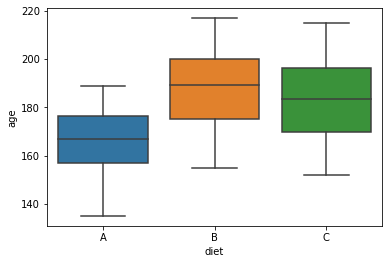

In [16]:
# Your solution goes here
ax = sns.boxplot(x='diet', y='age',data=data)
